In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier as KNN
from time import time
from sklearn.linear_model import LogisticRegression
import pickle
import math
from sklearn.ensemble import RandomForestClassifier

In [85]:
df1 = pd.read_csv("Test1655_240518.CSV") 
df2= pd.read_csv("Test1734_240518.CSV")

df1.describe()



,x,y
count,62930.000000,62930.000000
mean,0.437239,-2.463257
std,0.315404,0.338497
min,-0.639811,-3.179523
25%,0.336156,-2.547189
50%,0.435035,-2.478523
75%,0.541238,-2.414130
max,10.000000,8.546731


In [86]:
x_values=df1.iloc[:,0].values
y_values=df1.iloc[:,1].values



x_values2=df2.iloc[:,0].values
y_values2=df2.iloc[:,1].values

diff_x_values2=abs(np.diff(x_values2))
diff_y_values2=abs(np.diff(y_values2))


diff_x_values=abs(np.diff(x_values))
diff_y_values=abs(np.diff(y_values))




In [88]:
j=0
i=0
labels=[];
feature1=[];
feature2=[];
feature3=[];
feature4=[];
count=0
end=0
start=5930;




while(start>=5930 and end<17930):
    #FAN SPEED 1 and FAN SPEED 2
    count=count+1
    labels.append(1)
    end=start+100; 
    feature1.append(np.mean(diff_x_values[start:end]))
    feature2.append(np.std(diff_x_values[start:end])) 
    feature3.append(np.mean(diff_y_values[start:end]))
    feature4.append(np.std(diff_y_values[start:end])) 
    start=end
 


print count

end=0;
start=3000;

# while(start>=3000 and end<9000):
#     #FAN SPEED 3
#     count=count+1
#     labels.append(1)
#     end=start+100; 
#     feature1.append(np.mean(diff_x_values2[start:end]))
#     feature2.append(np.std(diff_x_values2[start:end])) 
#     feature3.append(np.mean(diff_y_values2[start:end]))
#     feature4.append(np.std(diff_y_values2[start:end])) 
#     start=end



start=20930
end=0

while(start>=20930 and end<23930):
    count=count+1
    #POWDER
    end=start+100
    feature1.append(np.mean(diff_x_values[start:end]))
    feature2.append(np.std(diff_x_values[start:end]))
    feature3.append(np.mean(diff_y_values[start:end]))
    feature4.append(np.std(diff_y_values[start:end]))
    start=end
 
    labels.append(2)


    

print count
m=26930
n=0


while(m>=26930 and n<29930):
    ##Spray
    count=count+1
    n=m+100
    feature1.append(np.mean(diff_x_values[m:n]))
    feature2.append(np.std(diff_x_values[m:n]))
    feature3.append(np.mean(diff_y_values[m:n]))
    feature4.append(np.std(diff_y_values[m:n])) 
    labels.append(3)
    m=n


m1=32930
n1=0



while(m1>=32930 and n1<35930):
    ##Dhoop
    count=count+1
    n1=m1+100
    feature1.append(np.mean(diff_x_values[m1:n1]))
    feature2.append(np.std(diff_x_values[m1:n1]))
    feature3.append(np.mean(diff_y_values[m1:n1]))
    feature4.append(np.std(diff_y_values[m1:n1])) 
    labels.append(4)
    m1=n1
    
print(count)


m1=2930
n1=0



while(m1>=2930 and n1<5930):
    ##AMBIENT
    count=count+1
    n1=m1+100
    feature1.append(np.mean(diff_x_values[m1:n1]))
    feature2.append(np.std(diff_x_values[m1:n1]))
    feature3.append(np.mean(diff_y_values[m1:n1]))
    feature4.append(np.std(diff_y_values[m1:n1])) 
    labels.append(5)
    m1=n1
   


m1=17930
n1=0


while(m1>=17930 and n1<20930):
    ##AMBIENT
    count=count+1
    n1=m1+100
    feature1.append(np.mean(diff_x_values[m1:n1]))
    feature2.append(np.std(diff_x_values[m1:n1]))
    feature3.append(np.mean(diff_y_values[m1:n1]))
    feature4.append(np.std(diff_y_values[m1:n1])) 
    labels.append(5)
    m1=n1    
    

    
print(count)


feature1=(np.asarray(feature1)).reshape(270,1)
feature2=(np.asarray(feature2)).reshape(270,1)
feature3=(np.asarray(feature3)).reshape(feature1.shape[0],1)
feature4=(np.asarray(feature4)).reshape(feature1.shape[0],1)

mag_diff1=(np.sqrt(feature1**2+feature3**2)).reshape(feature1.shape[0],1);
dir_diff1=(np.arctan(feature3/feature1)).reshape(feature1.shape[0],1);


mag_diff2=(np.sqrt(feature2**2+feature4**2)).reshape(feature1.shape[0],1);
dir_diff2=(np.arctan(feature4/feature2)).reshape(feature1.shape[0],1);

# Training features

training=np.concatenate((mag_diff1,dir_diff1,mag_diff2,dir_diff2), axis=1)
testing=np.asarray(labels)
print training.shape
print testing.shape

 
#TRAINING THE MODEL
clf = RandomForestClassifier(random_state=1)
clf.fit(training,testing)


with open('abs(Using_dhoop_amb_nofan3.pickle)','wb') as f:
    pickle.dump(clf,f)


print "MODEL SAVED"

120
150
210
270
(270, 4)
(270,)
MODEL SAVED


## in dir feature 51,135,149 becomes infintiy

In [197]:

x=np.isinf(feature3/feature1);
for ix in range (1,len(x)):
   if x[ix]==True:
     print ix
print feature3[149],feature1[149]


[ 0.05164573] [ 0.00253905]


## TESTING MODELS

In [17]:
df = pd.read_csv("./Experiment2_data_wired.csv")

print df.shape


j=0
i=0
labels=[];
feature1=[];
feature2=[];
feature3=[];
feature4=[];
count=0


x_values=df.iloc[2857:,0]
y_values=df.iloc[2857:,1]

diff_x_values=abs(np.diff(x_values))
diff_y_values=abs(np.diff(y_values))


m=0
n=0
while(m>=0 and n<6000):
    ##AMBIENT

    n=m+100
    count=count+1
    feature1.append(np.mean(diff_x_values[m:n]))
    feature2.append(np.std(diff_x_values[m:n]))
    feature3.append(np.mean(diff_y_values[m:n]))
    feature4.append(np.std(diff_y_values[m:n])) 
    labels.append(5)
    m=n    
    
 
end=0
start=6000;

while(start>=6000 and end<24000):
    #FAN SPEED 1 and FAN SPEED 2 and fan speed 3
    count=count+1
    labels.append(1)
    end=start+100; 
    feature1.append(np.mean(diff_x_values[start:end]))
    feature2.append(np.std(diff_x_values[start:end])) 
    feature3.append(np.mean(diff_y_values[start:end]))
    feature4.append(np.std(diff_y_values[start:end])) 
    start=end
 







m=24000
n=0
while(m>=24000 and n<27000):
    ##AMBIENT

    n=m+100
    count=count+1
    feature1.append(np.mean(diff_x_values[m:n]))
    feature2.append(np.std(diff_x_values[m:n]))
    feature3.append(np.mean(diff_y_values[m:n]))
    feature4.append(np.std(diff_y_values[m:n])) 
    labels.append(5)
    m=n     


    start=27000
end=0
while(start>=27000 and end<33000):

    #POWDER
    count=count+1
    end=start+100
    feature1.append(np.mean(diff_x_values[start:end]))
    feature2.append(np.std(diff_x_values[start:end]))
    feature3.append(np.mean(diff_y_values[start:end]))
    feature4.append(np.std(diff_y_values[start:end]))
    start=end
 
    labels.append(2)



m=33000
n=0
while(m>=33000 and n<36000):
    ##AMBIENT

    n=m+100
    count=count+1
    feature1.append(np.mean(diff_x_values[m:n]))
    feature2.append(np.std(diff_x_values[m:n]))
    feature3.append(np.mean(diff_y_values[m:n]))
    feature4.append(np.std(diff_y_values[m:n])) 
    labels.append(5)
    m=n     

   
    
    

m=36000
n=0


while(m>=36000 and n<42000):
    ##Spray

    n=m+100
    count=count+1
    feature1.append(np.mean(diff_x_values[m:n]))
    feature2.append(np.std(diff_x_values[m:n]))
    feature3.append(np.mean(diff_y_values[m:n]))
    feature4.append(np.std(diff_y_values[m:n])) 
    labels.append(3)
    m=n

    
m=42000
n=0

while(m>=42000 and n<48000):
    ##ambient

    n=m+100
    count=count+1
    feature1.append(np.mean(diff_x_values[m:n]))
    feature2.append(np.std(diff_x_values[m:n]))
    feature3.append(np.mean(diff_y_values[m:n]))
    feature4.append(np.std(diff_y_values[m:n])) 
    labels.append(5)
    m=n

    
m=48000
n=0



while(m>=48000 and n<54000):
    ##dhoop

    n=m+100
    count=count+1
    feature1.append(np.mean(diff_x_values[m:n]))
    feature2.append(np.std(diff_x_values[m:n]))
    feature3.append(np.mean(diff_y_values[m:n]))
    feature4.append(np.std(diff_y_values[m:n])) 
    labels.append(4)
    m=n
    

m=54000
n=0    
while(m>=54000 and n<60000):
    ##ambient

    n=m+100
    count=count+1
    feature1.append(np.mean(diff_x_values[m:n]))
    feature2.append(np.std(diff_x_values[m:n]))
    feature3.append(np.mean(diff_y_values[m:n]))
    feature4.append(np.std(diff_y_values[m:n])) 
    labels.append(5)
    m=n
    
    
    
   

print count 

feature1=np.asarray(feature1).reshape(600,1)
feature2=np.asarray(feature2).reshape(feature1.shape[0],1)
feature3=np.asarray(feature3).reshape(feature1.shape[0],1)
feature4=np.asarray(feature4).reshape(feature1.shape[0],1)


mag_diff1=(np.sqrt(feature1**2+feature3**2)).reshape(feature1.shape[0],1);
dir_diff1=(np.arctan(feature3/feature1)).reshape(feature1.shape[0],1);

mag_diff2=(np.sqrt(feature2**2+feature4**2)).reshape(feature1.shape[0],1);
dir_diff2=(np.arctan(feature4/feature2)).reshape(feature1.shape[0],1);


training=np.concatenate((mag_diff1,dir_diff1,mag_diff2,dir_diff2), axis=1)
testing=np.asarray(labels)
print training.shape
print testing.shape

 

(62857, 2)
600
(600, 4)
(600,)


### Testing 1 accuracy

70.3333333333
(600,)


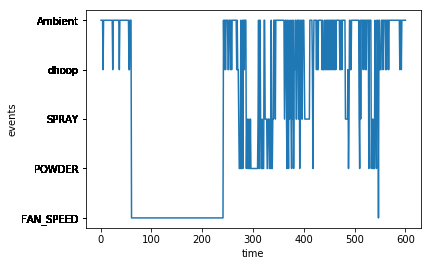

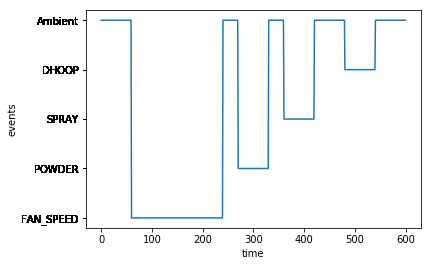

In [18]:
read=open('abs(Using_dhoop_amb_nofan3.pickle)','rb')
clf=pickle.load(read)

print clf.score(training,testing)*100

pred=clf.predict(training);


pred_str=[]
num=[]
for ix in range(0,len(pred)):
    num.append(ix+1)
    if pred[ix]==1:
        pred_str.append('FAN_SPEED')
        
    if pred[ix]==2:
        pred_str.append('POWDER')
        
    if pred[ix]==3:
        pred_str.append('SPRAY') 
        
    if pred[ix]==4:
        pred_str.append('dhoop')
        
    if pred[ix]==5:
        pred_str.append('Ambient')

pred_str=np.asarray(pred_str)   
print pred.shape

plt.figure(1)
plt.xlabel('time')
plt.ylabel('events')

    
plt.yticks(pred, pred_str)
plt.plot(num,pred)


pred_str=[]

for ix in range(0,len(pred)):
    num.append(ix+1)
    if testing[ix]==1:
        pred_str.append('FAN_SPEED')
        
    if testing[ix]==2:
        pred_str.append('POWDER')
        
    if testing[ix]==3:
        pred_str.append('SPRAY')  
        
    if testing[ix]==4:
        pred_str.append('DHOOP')  
    
    if testing[ix]==5:
        pred_str.append('Ambient')  

    

plt.figure(2)

plt.xlabel('time')
plt.ylabel('events')

plt.yticks(testing , pred_str)
plt.plot(testing)

    


plt.show()

In [20]:
df = pd.read_csv("Test1638_230518.csv")


j=0
i=0
labels=[];
feature1=[];
feature2=[];
feature3=[];
feature4=[];
count=0
end=0
start=3000;

x_values=df.iloc[2919:,0]

y_values=df.iloc[2919:,1]


diff_x_values=abs(np.diff(x_values))
diff_y_values=abs(np.diff(y_values))

m=0
n= 0

while(m>=0 and n<3000):
    ##AMBIENT
    count=count+1
    n=m+100
    feature1.append(np.mean(diff_x_values[m:n]))
    feature2.append(np.std(diff_x_values[m:n]))
    feature3.append(np.mean(diff_y_values[m:n]))
    feature4.append(np.std(diff_y_values[m:n])) 
    labels.append(5)
    m=n    

    

while(start>=3000 and end<12000):
    #FAN SPEED 1 and FAN SPEED 2 and 3
    count=count+1
    labels.append(1)
    end=start+100; 
    feature1.append(np.mean(diff_x_values[start:end]))
    feature2.append(np.std(diff_x_values[start:end])) 
    feature3.append(np.mean(diff_y_values[start:end]))
    feature4.append(np.std(diff_y_values[start:end])) 
    start=end
    
print count
end=0
start=15000; 



m=12000
n=0

while(m>=12000 and n<15000):
    ##AMBIENT
    count=count+1
    n=m+100
    feature1.append(np.mean(diff_x_values[m:n]))
    feature2.append(np.std(diff_x_values[m:n]))
    feature3.append(np.mean(diff_y_values[m:n]))
    feature4.append(np.std(diff_y_values[m:n])) 
    labels.append(5)
    m=n
    


while(start>=15000 and end<21000):
    #FAN SPEED 1 and FAN SPEED 2 and 3 
    count=count+1
    labels.append(1)
    end=start+100; 
    feature1.append(np.mean(diff_x_values[start:end]))
    feature2.append(np.std(diff_x_values[start:end])) 
    feature3.append(np.mean(diff_y_values[start:end]))
    feature4.append(np.std(diff_y_values[start:end])) 
    start=end


print count

m=21000
n=0


while(m>=21000 and n<27000):
    ##AMBIENT
    count=count+1
    n=m+100
    feature1.append(np.mean(diff_x_values[m:n]))
    feature2.append(np.std(diff_x_values[m:n]))
    feature3.append(np.mean(diff_y_values[m:n]))
    feature4.append(np.std(diff_y_values[m:n])) 
    labels.append(5)
    m=n


print count



start=27000
end=0



while(start>=27000 and end<30000):
    count=count+1
    #POWDER
    end=start+100
    feature1.append(np.mean(diff_x_values[start:end]))
    feature2.append(np.std(diff_x_values[start:end]))
    feature3.append(np.mean(diff_y_values[start:end]))
    feature4.append(np.std(diff_y_values[start:end]))
    start=end
 
    labels.append(2)


print count

m=30000
n=0


while(start>=30000 and end<33000):
    count=count+1
    #ambient
    end=start+100
    feature1.append(np.mean(diff_x_values[start:end]))
    feature2.append(np.std(diff_x_values[start:end]))
    feature3.append(np.mean(diff_y_values[start:end]))
    feature4.append(np.std(diff_y_values[start:end]))
    start=end
 
    labels.append(5)


print count

m=33000
n=0


while(m>=33000 and n<36000):
    ##Spray
    count=count+1
    n=m+100
    feature1.append(np.mean(diff_x_values[m:n]))
    feature2.append(np.std(diff_x_values[m:n]))
    feature3.append(np.mean(diff_y_values[m:n]))
    feature4.append(np.std(diff_y_values[m:n])) 
    labels.append(3)
    m=n
    
print count
m=36000
n=0

while(m>=36000 and n<39000):
    ##ambient
    count=count+1
    n=m+100
    feature1.append(np.mean(diff_x_values[m:n]))
    feature2.append(np.std(diff_x_values[m:n]))
    feature3.append(np.mean(diff_y_values[m:n]))
    feature4.append(np.std(diff_y_values[m:n])) 
    labels.append(5)
    m=n
    
print count



#Dhoop speed1, speed2, speed3
m=39000
n=0

    
while(m>=39000 and n<42000):
    ##dhoop
    count=count+1
    n=m+100
    feature1.append(np.mean(diff_x_values[m:n]))
    feature2.append(np.std(diff_x_values[m:n]))
    feature3.append(np.mean(diff_y_values[m:n]))
    feature4.append(np.std(diff_y_values[m:n])) 
    labels.append(4)
    m=n
 
print count
    



m=42000
n=0

while(m>=42000 and n<43000):
    ##ambient
    count=count+1
    n=m+100
    feature1.append(np.mean(diff_x_values[m:n]))
    feature2.append(np.std(diff_x_values[m:n]))
    feature3.append(np.mean(diff_y_values[m:n]))
    feature4.append(np.std(diff_y_values[m:n])) 
    labels.append(5)
    m=n
 
print count
        





feature1=np.asarray(feature1).reshape(430,1)
feature2=np.asarray(feature2).reshape(feature1.shape[0],1)
feature3=np.asarray(feature3).reshape(feature1.shape[0],1)
feature4=np.asarray(feature4).reshape(feature1.shape[0],1)


mag_diff1=(np.sqrt(feature1**2+feature3**2)).reshape(feature1.shape[0],1);
dir_diff1=(np.arctan(feature3/feature1)).reshape(feature1.shape[0],1);

mag_diff2=(np.sqrt(feature2**2+feature4**2)).reshape(feature1.shape[0],1);
dir_diff2=(np.arctan(feature4/feature2)).reshape(feature1.shape[0],1);


training=np.concatenate((mag_diff1,dir_diff1,mag_diff2,dir_diff2), axis=1)
testing=np.asarray(labels)
print training.shape
print testing.shape

 

120
210
270
300
330
360
390
420
430
(430, 4)
(430,)


## Testing 2 accuarcy

80.0
(430,)


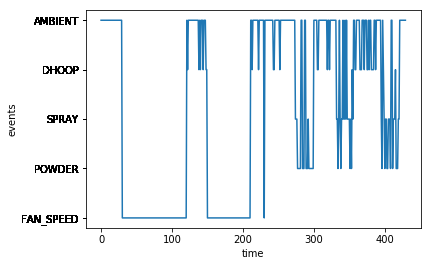

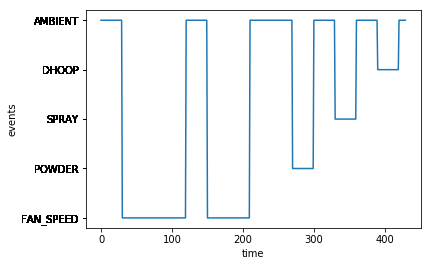

In [21]:
read=open('abs(Using_dhoop_amb_nofan3.pickle)','rb')
clf=pickle.load(read)


print clf.score(training,testing)*100
pred=clf.predict(training);

pred_str=[]
num=[]
for ix in range(0,len(pred)):
    
    if pred[ix]==1:
        pred_str.append('FAN_SPEED')
        
    if pred[ix]==2:
        pred_str.append('POWDER')
        
    if pred[ix]==3:
        pred_str.append('SPRAY')
        
    if pred[ix]==4:
        pred_str.append('DHOOP')
        
    if pred[ix]==5:
        pred_str.append('AMBIENT')
        
pred_str=np.asarray(pred_str)   
print pred.shape

plt.figure(1)
plt.xlabel('time')
plt.ylabel('events')
plt.yticks(pred, pred_str)
plt.plot(pred)



plt.show()



pred_str=[]
ix=0
num=[]

for ix in range(0,len(testing)):

    if testing[ix]==1:
        pred_str.append('FAN_SPEED')
        
    if testing[ix]==2:
        pred_str.append('POWDER')
        
    if testing[ix]==3:
        pred_str.append('SPRAY')  

    if testing[ix]==4:
        pred_str.append('DHOOP')
        
    if testing[ix]==5:
        pred_str.append('AMBIENT')    
        


plt.xlabel('time')
plt.ylabel('events')

plt.yticks(testing , pred_str)
plt.plot(testing)

plt.show()

In [22]:
    print pred

[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 5 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 4 5 4 5 5 5 4 5 5 5
 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 5 5 4 5 5 5 5 5 5 5 5
 4 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 4 4 5 5 5 5 5 5 5 4 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 3 3 2 2 2 2 2 5 5 2 2 2 5 5 2 2 2 3 2 2 2
 2 2 2 2 5 5 5 5 5 4 4 5 5 5 5 5 5 5 5 5 5 5 5 4 5 5 4 5 5 5 5 5 5 5 5 5 3
 3 2 3 5 3 2 3 3 5 3 3 5 3 5 3 3 3 3 2 3 2 4 3 5 5 4 4 5 5 5 5 5 4 4 4 5 5
 5 4 5 5 5 4 4 5 4 5 5 4 4 4 4 5 5 4 5 5 5 5 5 5 5 3 2 5 4 3 2 3 3 2 2 3 3
 3 2 5 5 2 3 3 3 4 2 2 2 3 3 5 5 5 5 5 5 5 5 5]
